In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
#import seaborn as sns
import geopandas as gpd
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

tp= pd.read_csv("../data/trash_hauler_report_with_lat_lng.csv")
tp.head()


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [2]:
tp.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637
20225,267137,11/1/2019,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1781360.323,637742.0068,-86.633331,36.083675


In [37]:
tp.isna().sum()

Request Number        0
Date Opened           0
Request               0
Description          31
Incident Address      9
Zip Code             75
Trash Hauler        901
Trash Route         947
Council District     49
State Plan X         28
State Plan Y         28
LONGITUDE            28
LATITUDE             28
dtype: int64

In [3]:
type('Incident Address')

str

In [4]:
tp.shape

(20226, 13)

In [5]:
tp['Request'].unique()

array(['Trash - Backdoor', 'Trash - Curbside/Alley Missed Pickup',
       'Trash Collection Complaint', 'Damage to Property'], dtype=object)

In [6]:


missed=tp[tp['Description'].str.contains('miss', case=False, na=False)]
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
7,25327,11/1/2017,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1731459.367,666013.6012,-86.802988,36.160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1770240.199,676334.3993,-86.671860,36.189483
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [7]:
missed.groupby(['Incident Address','Trash Hauler']).size().reset_index()

,Incident Address,Trash Hauler,0
0,1 BELLE FORREST AVE C,METRO,1
1,10 Belle Forrest Ave,METRO,1
2,"100 Bluefield Square, Nashville, TN 37214, Uni...",RED RIVER,1
3,100 Braxton Hill Ct,RED RIVER,1
4,100 Brook Hollow Rd,RED RIVER,1
...,...,...,...
9172,"Maxwell Xing, Brentwood, Tennessee, 37027",RED RIVER,1
9173,Robin Springs Rd,RED RIVER,1
9174,"Trevino Pl, Nashville, TN 37013, United States",RED RIVER,1
9175,"Westboro Dr, Nashville, TN 37209, United States",RED RIVER,1


In [8]:
rrmissed = missed[missed['Trash Hauler'].str.contains('RED RIVER', case=False, na=False)]
rrmissed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1721577.768,676018.3999,-86.836750,36.187584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1770240.199,676334.3993,-86.671860,36.189483
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [9]:
counts = rrmissed.groupby('Incident Address').size()
counts1 = counts[counts > 1]
counts1

#counts = red_river.groupby("Incident Address").size()
#counts[counts > 1]

Incident Address
100 Lincoln Ct, Nashville, TN 37205, United States            2
100 Nashboro Greens, Nashville, TN 37217, United States       2
1000 Trice Dr, Nashville, TN 37209, United States             2
1004 Chateau Valley Ct, Nashville, TN 37207, United States    2
1005 GRAYBAR LN, 37204                                        2
                                                             ..
958 Battery Ln, Nashville, TN 37220, United States            2
960 44th Ave N, Nashville, TN 37209, United States            3
971 Windrowe Dr, Nashville, TN 37205, United States           2
986 Malquin Dr, Nashville, TN 37216, United States            2
998 shadow ln                                                 2
Length: 1469, dtype: int64

In [10]:
fines = ((counts-1) *200)

In [11]:
total_rr_fines = fines.sum()
print(total_rr_fines)

520800


In [12]:
route = missed.groupby('Trash Route').size().sort_values(ascending = False)
route

Trash Route
4504     258
3302     220
1303     200
4404     197
3201     187
        ... 
4504S      2
1502S      1
4201S      1
2405S      1
2505S      1
Length: 172, dtype: int64

In [13]:
#4504     258
#3302     220
#1303     200
#4404     197
#3201     187

In [14]:
difhaulers = missed['Trash Hauler'].unique()
difhaulers

array(['RED RIVER', 'WASTE IND', 'METRO', nan, 'Metro'], dtype=object)

In [15]:
missed['Trash Hauler'].value_counts()

Trash Hauler
RED RIVER    9586
METRO        2118
WASTE IND     791
Metro          22
Name: count, dtype: int64

In [34]:
mth = missed['Trash Hauler'].str.upper()
mth2= mth.value_counts()

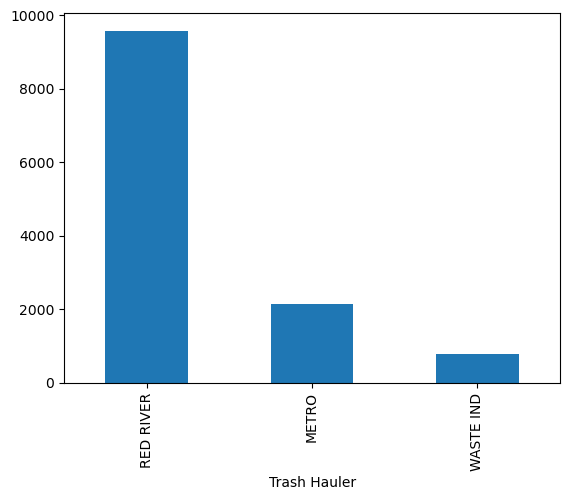

In [26]:
plt.figure()
mth2.plot(kind = 'bar')
plt.show()

In [36]:
counts_by_hauler = (missed.groupby(['Trash Hauler', 'Incident Address'])).size().reset_index()
counts_by_hauler

,Trash Hauler,Incident Address,0
0,METRO,1 BELLE FORREST AVE C,1
1,METRO,10 Belle Forrest Ave,1
2,METRO,"100 Marshall Ct, Nashville, TN 37212, United S...",2
3,METRO,"1000 Gilmore Ave, Nashville, TN 37204, United ...",1
4,METRO,1000 W Eastland Ave,1
...,...,...,...
9172,WASTE IND,"941 31st Ave N, Nashville, TN 37209, United St...",1
9173,WASTE IND,944 4th Ave S,2
9174,WASTE IND,"945 31st Ave N, Nashville, TN 37209, United St...",1
9175,WASTE IND,945 4th Ave S,1


In [31]:
type(counts_by_hauler)

pandas.core.frame.DataFrame

In [46]:
total_fines = (counts_by_hauler([0]-1 *200))

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [38]:
tp['Trash Hauler'] = tp['Trash Hauler'].str.lower()

In [40]:
tp['Trash Hauler'].sort_values()

17514    metro
2855     metro
12877    metro
17876    metro
2858     metro
         ...  
20156      NaN
20187      NaN
20189      NaN
20209      NaN
20211      NaN
Name: Trash Hauler, Length: 20226, dtype: object

In [51]:
#select appropriate data frame
(missed['Incident Address']
 .str.lower()
 .str.strip()
 .str.split(',',expand=True)[0].value_counts()[lambda x: x>1].apply(lambda x: 200 * (x-1)).sum()
)

914000